In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# from ipywidgets import interact#, interactive, fixed, interact_manual
# from ipywidgets import Layout, Box

import pyradi.ryplot as ryplot  # https://github.com/NelisW/pyradi
%matplotlib inline

import network


Define the data set. This is a small set, just used to demonstrate the principle.

In [39]:

def vectorized_result(j):
    """Return a 2-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...1) into a corresponding desired output from the neural
    network."""
    e = np.zeros((2, 1))
    e[j] = 1.0
#     print(e)
    return e


In [40]:
x = np.asarray([[3,7],[1.,5.],[2.,7.],[9.,7.],[9.,6.],[9.,5.],[7.,9.],[2.,5.],[3.,4.],[10.,7.],[1.,7.],[3.4,6.0],[7.,7.],[0.,10.],
                [6.,5.5],[9.,9.5],[5.,7.],[4.,8.],[2.,3.],[5.,4.5],[1.,.7],
                [0.5,3.],[5.,3.2],[0.5,4.],[3.4,3.2],[2.3,1.2],[7.,5.5],
                [6.,4.],[4.,1.],[2.,0.5],[0.,5.],[9.,3.],[7.,3.],[7.,3.],[7.,2.],[2.,2.],[5.,2.],[3.,2.],[10.,0],[1,2]]).astype(np.float32)
# 1's are X, zeros are O
y = np.asarray([*20*[1],*20*[0]]).reshape(-1,)
xin = [np.reshape(xi,(-1,1)) for xi in x]
yin = [vectorized_result(yi) for yi in y]
training_data = zip(xin,yin)
test_data = zip(xin.copy(),y.copy())

# nonlin = 'tansig'
nonlin = 'sigmoid'
if nonlin == 'sigmoid':
    nlfn=network.sigmoid
    nlfnpr=network.sigmoid_prime
else:
    nlfn=network.tansig
    nlfnpr=network.tansig_prime

mini_batch_size = x.shape[0]
epochs = 2500
eta = 5

case = 4

if case == 4:
    numhid = 4
    seed = 10
elif case == 8:
    numhid = 8
    seed = 10
elif case == 5:
    numhid = 4
    seed = 1
    
net = network.Network(sizes=[2, numhid, 2],nlfn=nlfn,nlfnpr=nlfnpr,silent=False,seed=seed)
net.SGD(training_data, epochs=epochs, mini_batch_size=mini_batch_size, eta=eta,test_data=test_data)



Epoch 0: 20 / 40
Epoch 200: 35 / 40
Epoch 400: 37 / 40
Epoch 600: 38 / 40
Epoch 800: 38 / 40
Epoch 1000: 39 / 40
Epoch 1200: 39 / 40
Epoch 1400: 36 / 40
Epoch 1600: 38 / 40
Epoch 1800: 40 / 40
Epoch 2000: 40 / 40
Epoch 2200: 40 / 40
Epoch 2400: 40 / 40


In [41]:
print(net.biases)
print(net.biases[1])
print(net.weights)
print(net.weights[0][0][0])


[array([[ -7.58018369],
       [  7.79859677],
       [-13.51501471],
       [  7.99171721]]), array([[ 1.10492507],
       [-1.18933277]])]
[[ 1.10492507]
 [-1.18933277]]
[array([[-0.65787918,  3.23481747],
       [ 5.91509332, -8.49299921],
       [ 2.6269186 , -1.29717433],
       [-4.60104589, -0.98808627]]), array([[-5.57568671,  7.15602337, -5.48699221,  8.18590865],
       [ 5.64050315, -7.12127086,  5.4917575 , -8.16258539]])]
-0.6578791822870345


`net.biases[0]` are the bias values for the hidden neurons.  
`net.biases[0][n]` is the bias value for the hidden neuron n.  
`net.biases[1]` is the bias value for the output neuron.  

`net.weights[0]` are the weight values for the hidden neurons.  
`net.weights[0][n]` are the weight values for the hidden neuron n.  
`net.weights[0][n][0]` is the weight value between input x1 and the hidden neuron n.  
`net.weights[0][n][1]` is the weight value between input x2 and the hidden neuron n.  

$0 = w_1x_1+w_2x_2+b$  
$x_2 = (-w_1x_1 -b)/w_2 $  


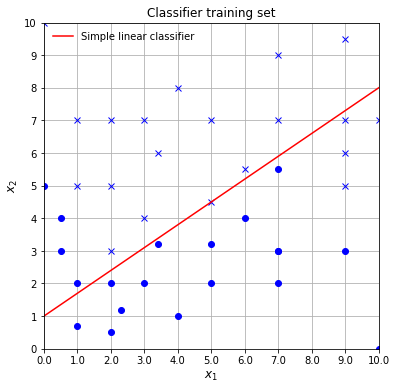

In [42]:
# plot the training set and a simple linear classifier
p = ryplot.Plotter(1,1,1,figsize=(6,6),doWarning=False)
for (x1,x2),yo in zip(x,y):
    marker = 'o' if yo==0 else 'x'
    p.plot(1,x1,x2,'Classifier training set','$x_1$','$x_2$',linestyle='',markers=[marker],plotCol=['b'],pltaxis=[0,10,0,10])
x1 = np.linspace(0,10,100)
p.plot(1,x1,x1*7/10+1,label=['Simple linear classifier'],plotCol=['r'])
p.saveFig('../pic/chC-trainingset.pdf')               

In [43]:
xp = np.linspace(0,10,100)
yp = np.linspace(0,10,100)
varx, vary = np.meshgrid(xp, yp)

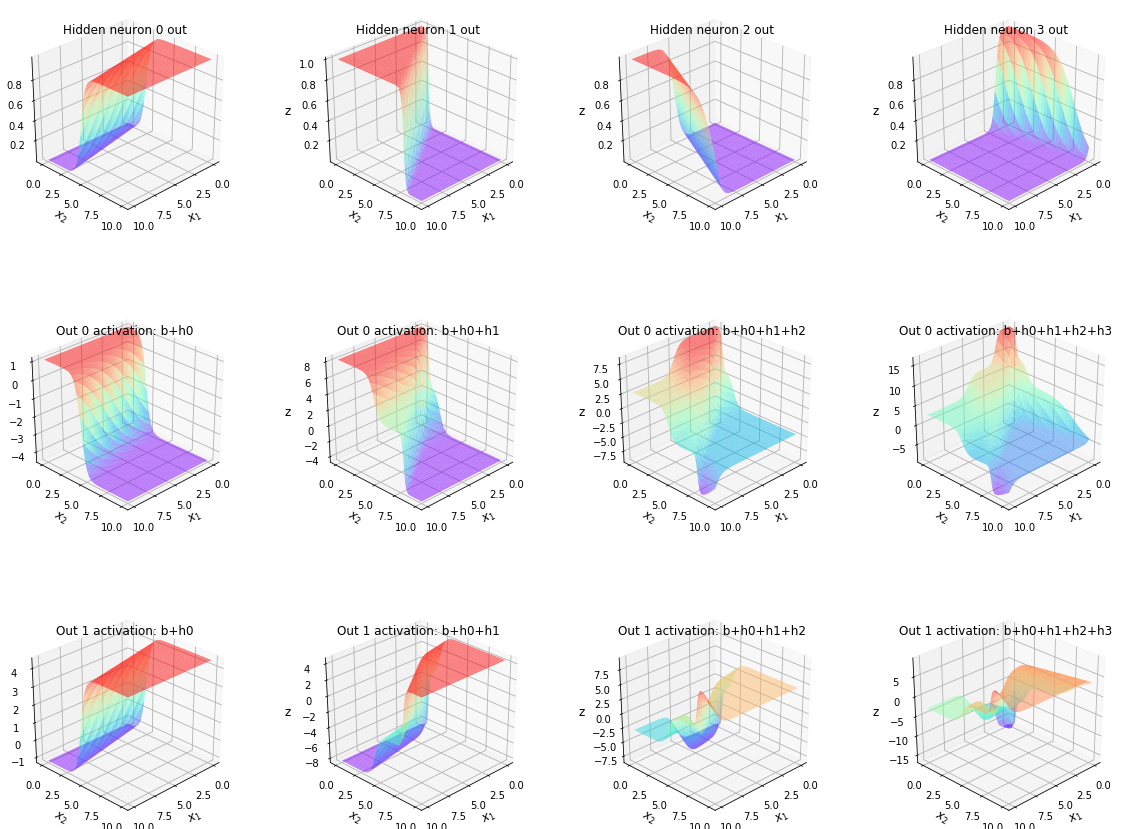

In [44]:
p = ryplot.Plotter(1,3,numhid,figsize=(5*numhid,5*3),doWarning=False)
hidden = []
asum0 = net.biases[1][0] * np.ones(varx.shape)
asum1 = net.biases[1][1] * np.ones(varx.shape)
isum = 'b+'
for i in range(numhid):
    isum += f'h{i}'
    hidden.append(nlfn(varx * net.weights[0][i][0] + vary * net.weights[0][i][1] + net.biases[0][i]))
    asum0 += hidden[i] * net.weights[1][0][i]
    asum1 += hidden[i] * net.weights[1][1][i]

    p.mesh3D(i+1, varx, vary, hidden[i], ptitle=f'Hidden neuron {i} out', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0., maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
    
    p.mesh3D(i+5, varx, vary, asum0, ptitle=f'Out 0 activation: {isum}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0., maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
    p.mesh3D(i+9, varx, vary, asum1, ptitle=f'Out 1 activation: {isum}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0., maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
    isum += '+'
p.saveFig(f'../pic/chC-hiddeneurons{case:02d}-{nonlin}.pdf')


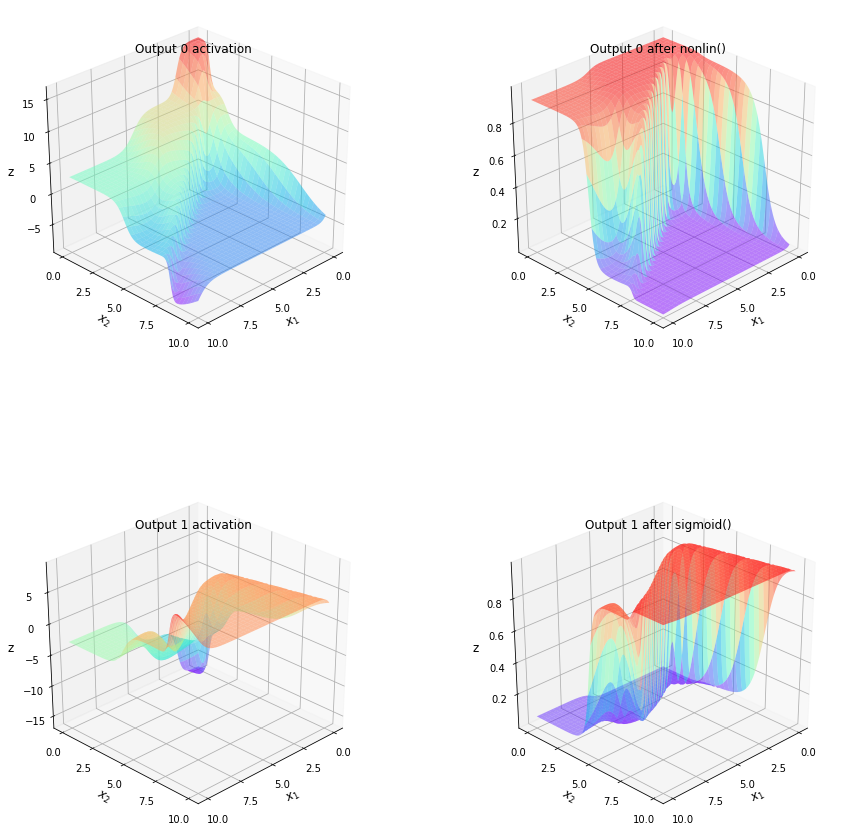

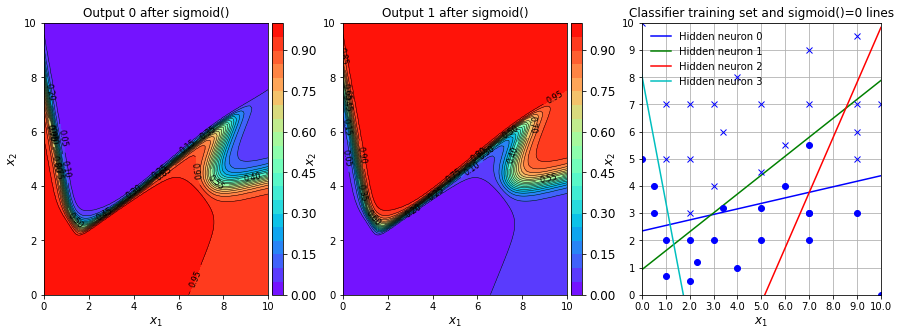

In [45]:



p = ryplot.Plotter(1,2,2,figsize=(15,15),doWarning=False)
p.mesh3D(1, varx, vary, asum0, ptitle=f'Output 0 activation', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
p.mesh3D(2, varx, vary, nlfn(asum0), ptitle=f'Output 0 after nonlin()', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);

p.mesh3D(3, varx, vary, asum1, ptitle=f'Output 1 activation', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
p.mesh3D(4, varx, vary, nlfn(asum1), ptitle=f'Output 1 after {nonlin}()', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);
p.saveFig(f'../pic/chC-classifa{case:02d}.pdf')

q = ryplot.Plotter(2,1,3,figsize=(15,5),doWarning=False)
# q.meshContour(1, xp,yp, nlfn(asum0), levels=[-1, -0.5,-0.1,-0.05,0, 0.05,0.1,0.5,1],
q.meshContour(1, xp,yp, nlfn(asum0), levels=20,
              ptitle=f'Output 0 after {nonlin}()', xlabel='$x_1$', ylabel='$x_2$',
                plotCol=['k'], titlefsize=12, meshCmap=cm.rainbow, cbarshow=True,
                cbarorientation='vertical', cbarfontsize=12, drawGrid=False, yInvert=False, 
                negativeSolid=True, contourFill=True, contourLine=True, logScale=False,
                contLabel=True, contFmt='%.2f', contCol='k', contFonSz=8);
# q.meshContour(2, xp,yp, nlfn(asum1), levels=[-1, -0.5,-0.1,-0.05,0, 0.05,0.1,0.5,1],
q.meshContour(2, xp,yp,nlfn(asum1), levels=20,
              ptitle=f'Output 1 after {nonlin}()', xlabel='$x_1$', ylabel='$x_2$',
                plotCol=['k'], titlefsize=12, meshCmap=cm.rainbow, cbarshow=True,
                cbarorientation='vertical', cbarfontsize=12, drawGrid=False, yInvert=False, 
                negativeSolid=True, contourFill=True, contourLine=True, logScale=False,
                contLabel=True, contFmt='%.2f', contCol='k', contFonSz=8);

xn1 = np.linspace(0,10,100)
for i in range(numhid):
    xn2 = (-xn1*net.weights[0][i][0] - net.biases[0][i]) / net.weights[0][i][1]
    q.plot(3,xn1,xn2,label=[f'Hidden neuron {i}'])

for (x1,x2),yo in zip(x,y):
    marker = 'o' if yo==0 else 'x'
    q.plot(3,x1,x2,f'Classifier training set and {nonlin}()=0 lines','$x_1$','$x_2$',linestyle='',markers=[marker],plotCol=['b'],pltaxis=[0,10,0,10])

    q.saveFig(f'../pic/chC-classifb{case:02d}-{nonlin}.pdf')


## tansig 

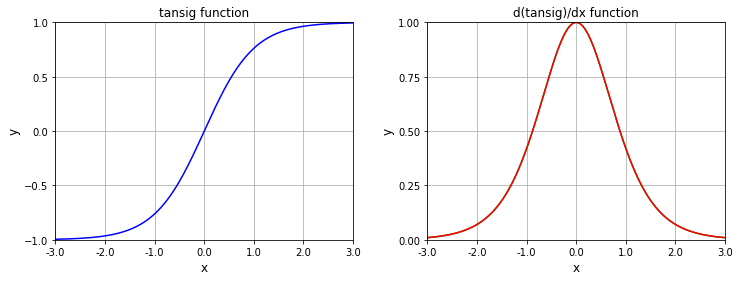

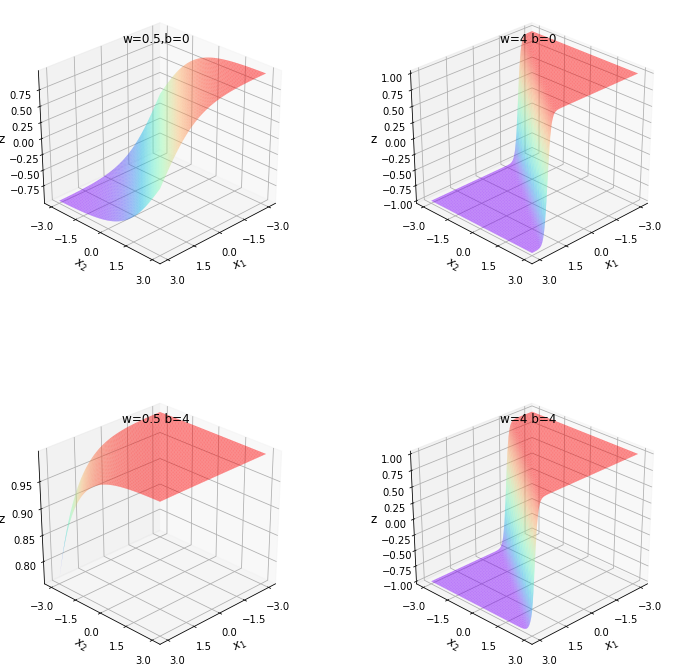

In [46]:
xts = np.linspace(-3,3,200)
yts = np.linspace(-3,3,200)
varxts, varyts = np.meshgrid(xts, yts)

p = ryplot.Plotter(1,1,2,figsize=(12,4),doWarning=False)
p.plot(1,xts,network.tansig(xts),'tansig function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,-1,1]);
p.plot(2,xts,network.tansig_prime(xts),'d(tansig) function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,-1,1]);
p.plot(2,xts,np.gradient(network.tansig(xts),xts),'d(tansig)/dx function', 'x','y',maxNX=7,maxNY=4,pltaxis=[-3,3,0,1]);
p.saveFig(f'../pic/tansig01.pdf')

q = ryplot.Plotter(2,2,2,figsize=(12,12),doWarning=False)

w = .5
b = 0
ts = network.tansig(-varxts * w + varyts * w + b)
q.mesh3D(1, varxts, varyts, ts, ptitle=f'w={w},b={b}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);

w = 4
ts = network.tansig(-varxts * 1.4 * w + varyts * w + b)
q.mesh3D(2, varxts, varyts, ts, ptitle=f'w={w} b={b}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);

w = .5
b = 4
ts = network.tansig(-varxts * w + varyts * w + b)
q.mesh3D(3, varxts, varyts, ts, ptitle=f'w={w} b={b}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);

w = 4
ts = network.tansig(-varxts * 1.4 * w + varyts * w + b)
q.mesh3D(4, varxts, varyts, ts, ptitle=f'w={w} b={b}', xlabel='$x_1$', ylabel='$x_2$', zlabel='z',
      plotCol=['r'], edgeCol=['k'], rstride=3, cstride=3, linewidth= 0.0, maxNX=5, maxNY=5, maxNZ=0,
      drawGrid=True, cbarshow=False, alpha=0.5);


q.saveFig(f'../pic/tansig02.pdf')
